Форма данных: (918, 12)

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

Проверка пропущенных значений:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0

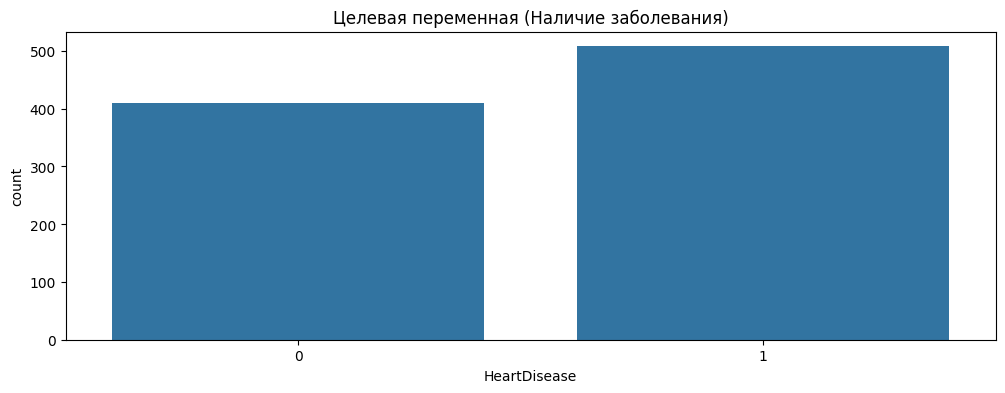

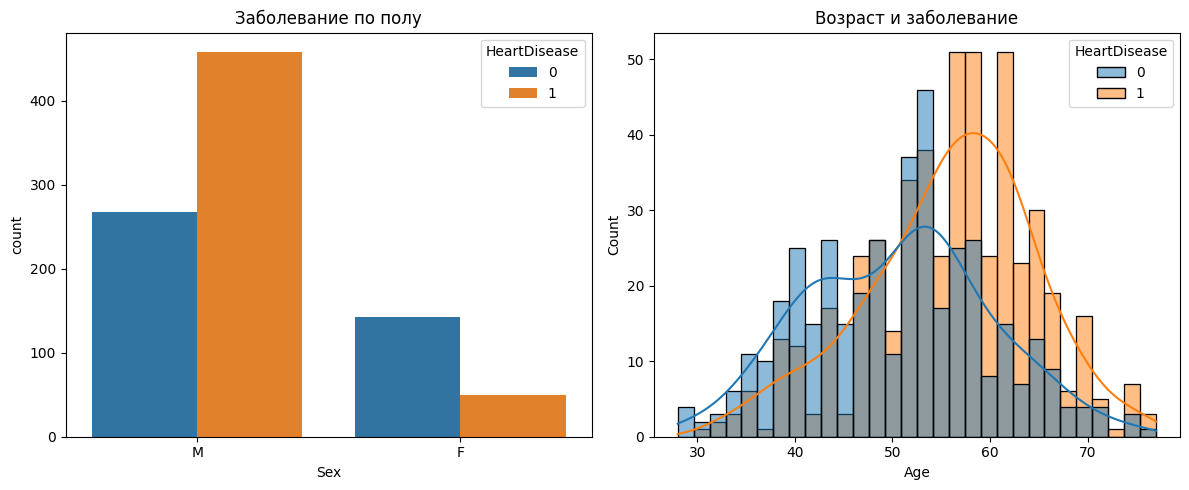

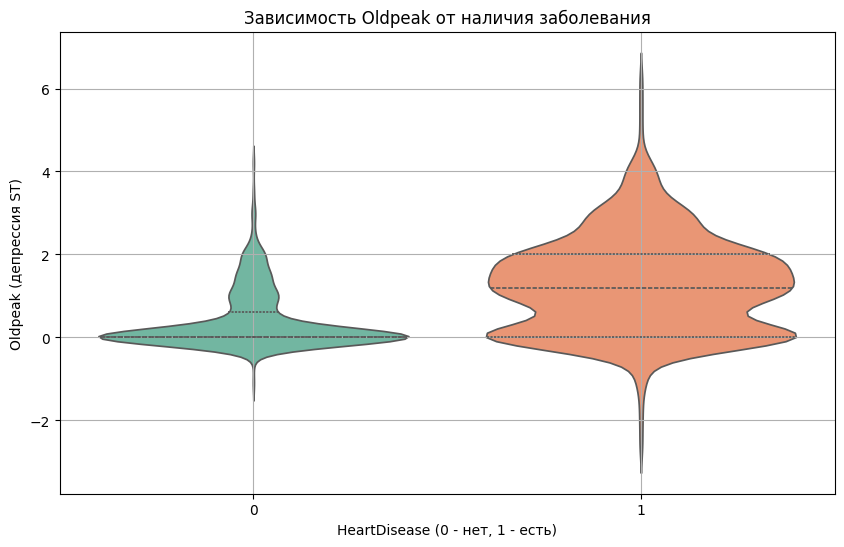

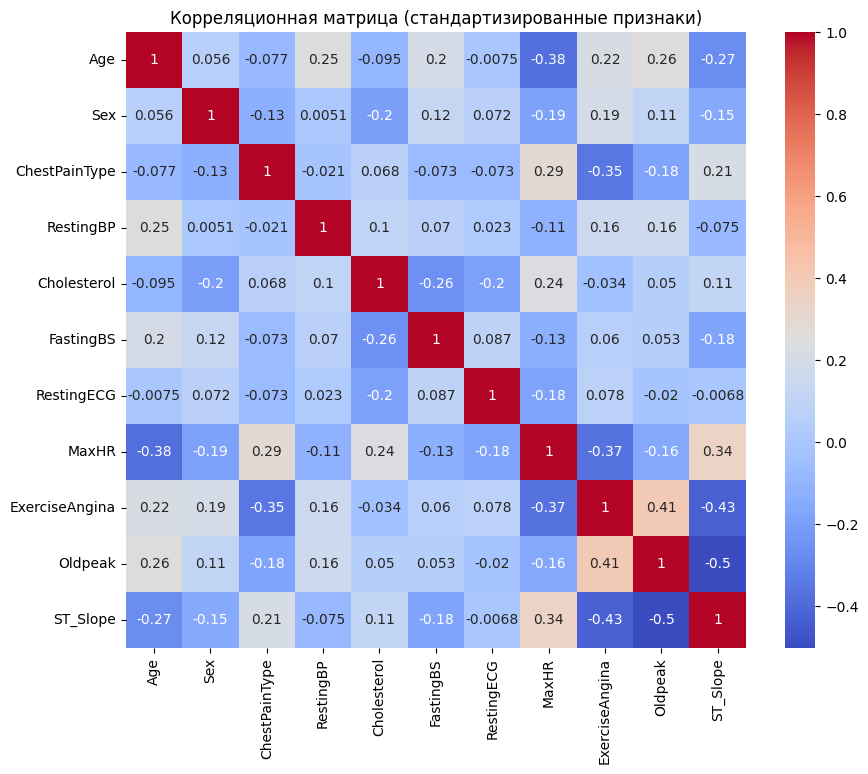


Поиск параметров для модели: Logistic Regression
Лучшие параметры: {'C': 0.1}

Поиск параметров для модели: Decision Tree
Лучшие параметры: {'max_depth': 3}

Поиск параметров для модели: Random Forest
Лучшие параметры: {'max_depth': 6, 'n_estimators': 100}

Поиск параметров для модели: Gradient Boosting
Лучшие параметры: {'learning_rate': 0.05, 'n_estimators': 50}

Поиск параметров для модели: SVM
Лучшие параметры: {'C': 1, 'kernel': 'rbf'}


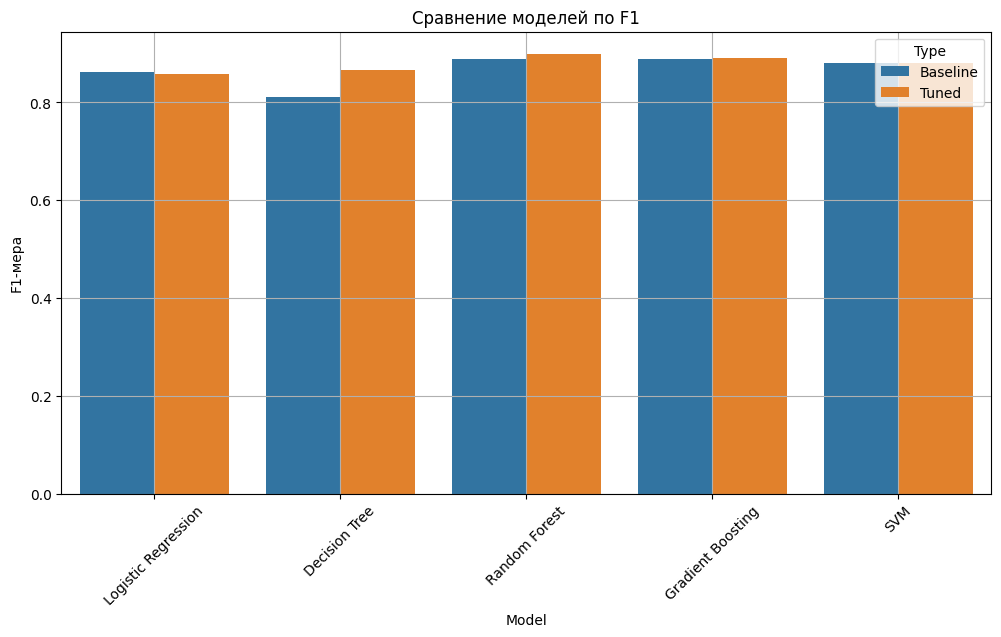


Полная таблица метрик:


,Model,Type,Accuracy,Precision,Recall,F1
0,Logistic Regression,Baseline,0.847826,0.907216,0.822430,0.862745
1,Decision Tree,Baseline,0.793478,0.863158,0.766355,0.811881
2,Random Forest,Baseline,0.875000,0.920000,0.859813,0.888889
3,Gradient Boosting,Baseline,0.875000,0.920000,0.859813,0.888889
4,SVM,Baseline,0.864130,0.894231,0.869159,0.881517
5,Logistic Regression,Tuned,0.842391,0.897959,0.822430,0.858537
6,Decision Tree,Tuned,0.847826,0.891089,0.841121,0.865385
7,Random Forest,Tuned,0.885870,0.921569,0.878505,0.899522
8,Gradient Boosting,Tuned,0.875000,0.903846,0.878505,0.890995
9,SVM,Tuned,0.864130,0.894231,0.869159,0.881517



🏆 Лучшая модель: Random Forest


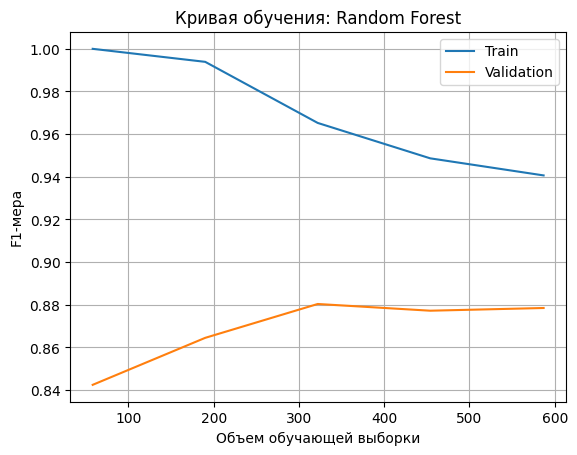


✅ Выводы:
- Проведен полный цикл: загрузка, EDA, обработка, моделирование, подбор гиперпараметров.
- Лучшая модель по F1: Random Forest
- Использованы 5 моделей, 2 из них — ансамблевые.
- Модель сохранена, можно подключать в Streamlit.


In [1]:
# НИРС по теме: Предсказание наличия сердечного заболевания
# Задание: Выполнить полный цикл машинного обучения с построением модели, подбором гиперпараметров и созданием веб-приложения

# Шаг 1. Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import pickle
import warnings
warnings.filterwarnings('ignore')

# Шаг 2. Загрузка набора данных
df = pd.read_csv('../data/heart.csv')
print("Форма данных:", df.shape)
df.head()

# Шаг 3. Разведочный анализ
print("\nИнформация о данных:")
print(df.info())

print("\nПроверка пропущенных значений:")
print(df.isnull().sum())

# Шаг 4. Визуализация признаков
plt.figure(figsize=(12, 4))
sns.countplot(x='HeartDisease', data=df)
plt.title('Целевая переменная (Наличие заболевания)')
plt.show()

# Визуализируем распределения по полу и возрасту
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Sex', hue='HeartDisease', data=df)
plt.title('Заболевание по полу')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Age', hue='HeartDisease', kde=True, bins=30)
plt.title('Возраст и заболевание')
plt.tight_layout()
plt.show()

# Визуализация зависимости Oldpeak и наличия заболевания
plt.figure(figsize=(10, 6))
sns.violinplot(x='HeartDisease', y='Oldpeak', data=df, inner='quartile', palette='Set2')
plt.title('Зависимость Oldpeak от наличия заболевания')
plt.xlabel('HeartDisease (0 - нет, 1 - есть)')
plt.ylabel('Oldpeak (депрессия ST)')
plt.grid(True)
plt.show()


# Шаг 5. Предобработка
# Кодируем категориальные признаки
df_encoded = df.copy()
categorical = df_encoded.select_dtypes(include='object').columns
for col in categorical:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Определяем признаки и целевую переменную
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

# Стандартизация
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Шаг 6. Корреляционный анализ
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(X_scaled, columns=X.columns).corr(), annot=True, cmap='coolwarm')
plt.title("Корреляционная матрица (стандартизированные признаки)")
plt.show()

# Шаг 7. Делим на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Шаг 8. Выбираем метрики и строим baseline модели
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    return {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'Type': 'Baseline'
    }

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True)
}

baseline_results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    baseline_results.append(evaluate_model(model, name))

# Шаг 9. Подбор гиперпараметров
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': [3, 5, 7]},
    'Random Forest': {'n_estimators': [50, 100], 'max_depth': [4, 6]},
    'Gradient Boosting': {'n_estimators': [50, 100], 'learning_rate': [0.05, 0.1]},
    'SVM': {'C': [0.1, 1], 'kernel': ['linear', 'rbf']}
}

tuned_results = []
tuned_models = {}

for name, model in models.items():
    print(f"\nПоиск параметров для модели: {name}")
    grid = GridSearchCV(model, param_grids[name], cv=5, scoring='f1')
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    tuned_models[name] = best_model
    y_pred = best_model.predict(X_test)
    tuned_results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'Type': 'Tuned'
    })
    print(f"Лучшие параметры: {grid.best_params_}")

# Шаг 10. Сравнение моделей до и после настройки

all_results = pd.DataFrame(baseline_results + tuned_results)

plt.figure(figsize=(12,6))
sns.barplot(data=all_results, x='Model', y='F1', hue='Type')
plt.title('Сравнение моделей по F1')
plt.ylabel('F1-мера')
plt.xticks(rotation=45)
plt.grid()
plt.show()

print("\nПолная таблица метрик:")
display(all_results[['Model', 'Type', 'Accuracy', 'Precision', 'Recall', 'F1']])

# Шаг 11. Сохраняем лучшую модель и scaler
best_model_name = max(tuned_results, key=lambda x: x['F1'])['Model']
print(f"\n🏆 Лучшая модель: {best_model_name}")

with open('../models/best_model.pkl', 'wb') as f:
    pickle.dump(tuned_models[best_model_name], f)

with open('../models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('../models/random_forest_model.pkl', 'wb') as f:
    pickle.dump(models['Random Forest'], f)  # обычный, без настройки

# Шаг 12. Кривая обучения
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, cv=5, scoring='f1')
    train_mean = train_scores.mean(axis=1)
    val_mean = val_scores.mean(axis=1)
    plt.plot(train_sizes, train_mean, label='Train')
    plt.plot(train_sizes, val_mean, label='Validation')
    plt.title(title)
    plt.xlabel("Объем обучающей выборки")
    plt.ylabel("F1-мера")
    plt.legend()
    plt.grid()
    plt.show()

plot_learning_curve(tuned_models[best_model_name], X_train, y_train, f"Кривая обучения: {best_model_name}")

# Шаг 13. Финальные выводы
print("\n✅ Выводы:")
print("- Проведен полный цикл: загрузка, EDA, обработка, моделирование, подбор гиперпараметров.")
print(f"- Лучшая модель по F1: {best_model_name}")
print("- Использованы 5 моделей, 2 из них — ансамблевые.")
print("- Модель сохранена, можно подключать в Streamlit.")
